In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/full.csv")
# df = pd.read_csv("Assembled_Workers__Compensation_Claims___Beginning_2000.csv")

/tmp/ipykernel_21721/924944673.py:5: DtypeWarning: Columns (22,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/full.csv")


: 

: 

In [ ]:
df_sub = df.sample(100000)
df_sub.to_csv("data/sub.csv", index=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/sub.csv")
df.columns = [c.replace(" ", "_") for c in df.columns.str.lower().tolist()]
date_columns = [
    "accident_date", "ancr_date", "assembly_date", "c-2_date", "c-3_date", "controverted_date", 
    "first_appeal_date", "first_hearing_date", "ppd_non-scheduled_loss_date", "ppd_scheduled_loss_date",
    "ptd_date", "section_32_date"
    ]
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

yn_columns = ["accident", "alternative_dispute_resolution", "attorney/representative", "occupational_disease", "covid-19_indicator"]
for column in yn_columns:
    df[column] = np.where(df[column]=="Y", 1, 0)

df["gender"] = np.where(df["gender"] == "M", 1, 0)
df["ime-4_count"] = np.where(df["ime-4_count"].isna(), 0, df["ime-4_count"])

logic = df.accident_date >= '2000-01-01'
df = df[logic]




In [3]:
df["accident_date_month_trunc"] = df["accident_date"] + pd.offsets.MonthBegin(-1)

In [4]:
by_day = df.groupby("accident_date").count()["claim_identifier"]
by_month = df.groupby("accident_date_month_trunc").count()["claim_identifier"]

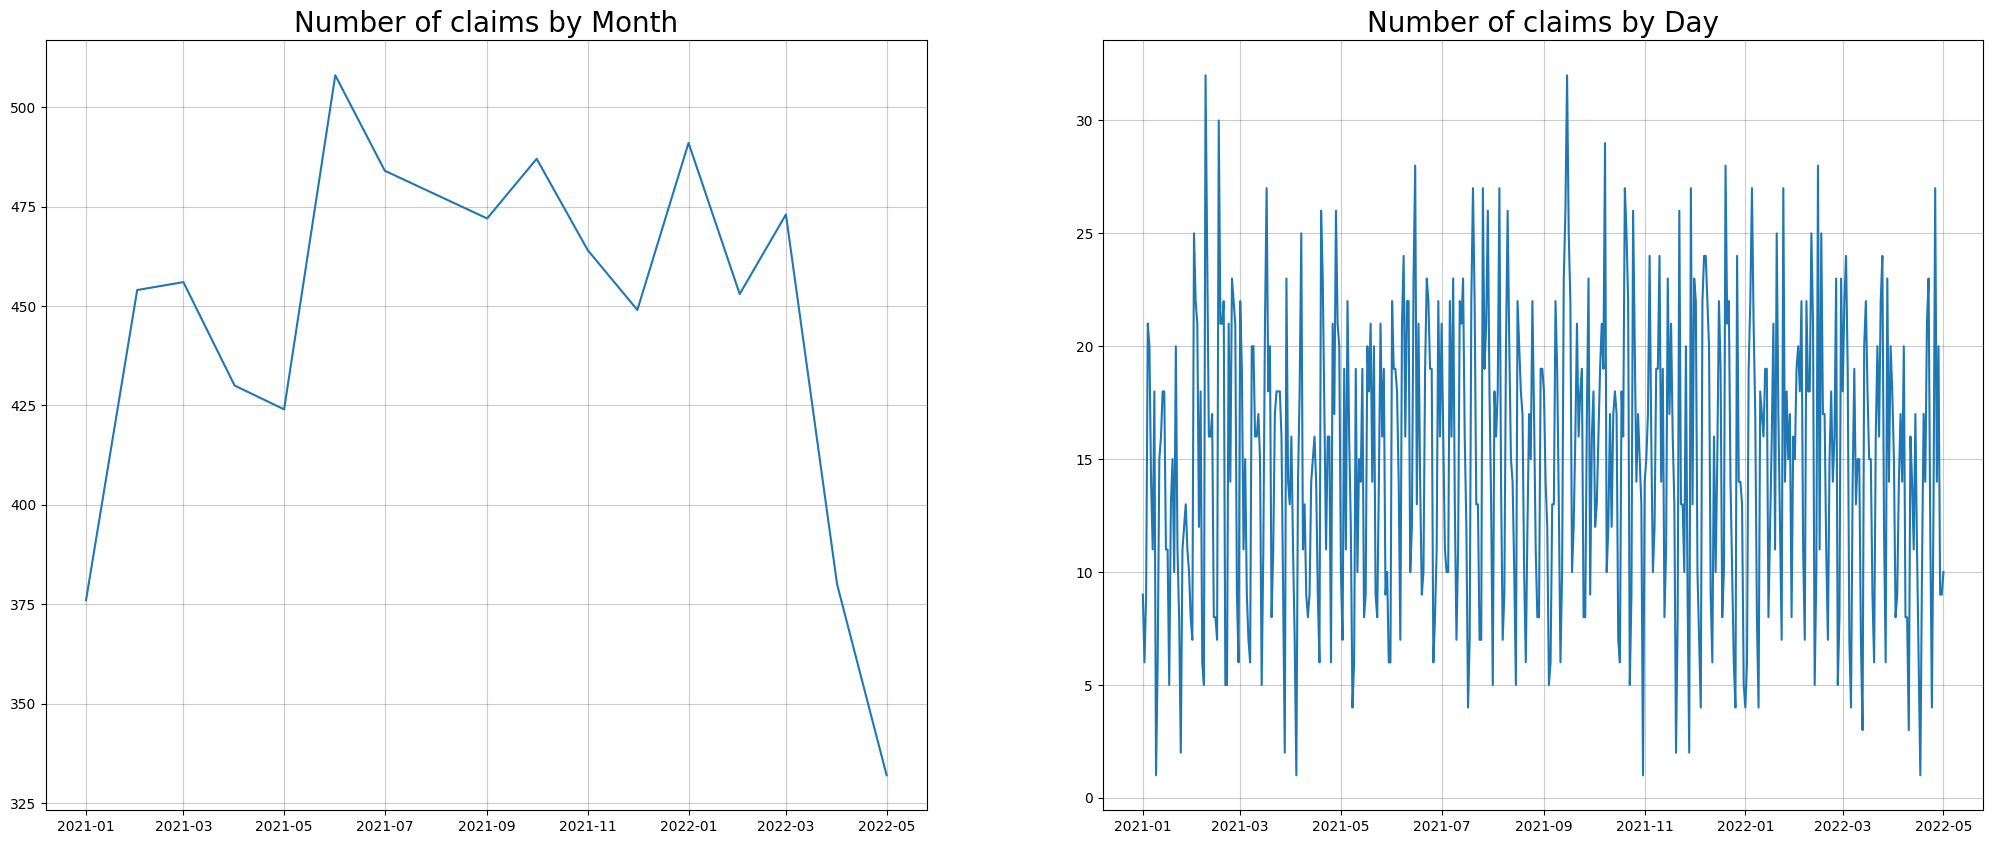

In [36]:
import matplotlib
edge_c = matplotlib.colors.colorConverter.to_rgba('black', alpha=.3)

xlim = ("2021-01-01", "2022-05-01")
month_logic = (by_month.index >= xlim[0]) & (by_month.index <= xlim[1])
day_logic = (by_day.index >= xlim[0]) & (by_day.index <= xlim[1])

fig, axs = plt.subplots(ncols=2, figsize=(25, 10))
axs[0].set_title("Number of claims by Month", fontdict={'fontsize': 20})
axs[0].grid(color=edge_c, alpha=0.2)
axs[0].plot(by_month[month_logic])

axs[1].set_title("Number of claims by Day", fontdict={'fontsize': 20})
axs[1].grid(color=edge_c, alpha=0.2)
axs[1].plot(by_day[day_logic])
# axs[1].text(pd.to_datetime("2001-09-12"), 12500, "9/11")
# axs[1].text(pd.to_datetime("2020-03-01"), 2000, "Covid-19")
fig.savefig("plots/overall_timeseries.png")

In [3]:
wcio_nature_of_injury = df.groupby("wcio_nature_of_injury_description").count()["claim_identifier"].sort_values(ascending=False)
wcio_cause_of_injury = df.groupby("wcio_cause_of_injury_description").count()["claim_identifier"].sort_values(ascending=False)
wcio_part_of_body = df.groupby("wcio_part_of_body_description").count()["claim_identifier"].sort_values(ascending=False)
oiics_nature_of_injury = df.groupby("oiics_nature_of_injury_description").count()["claim_identifier"].sort_values(ascending=False)
oiics_part_of_body = df.groupby("oiics_part_of_body_description").count()["claim_identifier"].sort_values(ascending=False)
oiics_injury_source = df.groupby("oiics_injury_source_description").count()["claim_identifier"].sort_values(ascending=False)

/tmp/ipykernel_24175/1339826472.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels[0:top_n-1], fontdict={"fontsize": 20}, rotation=45)


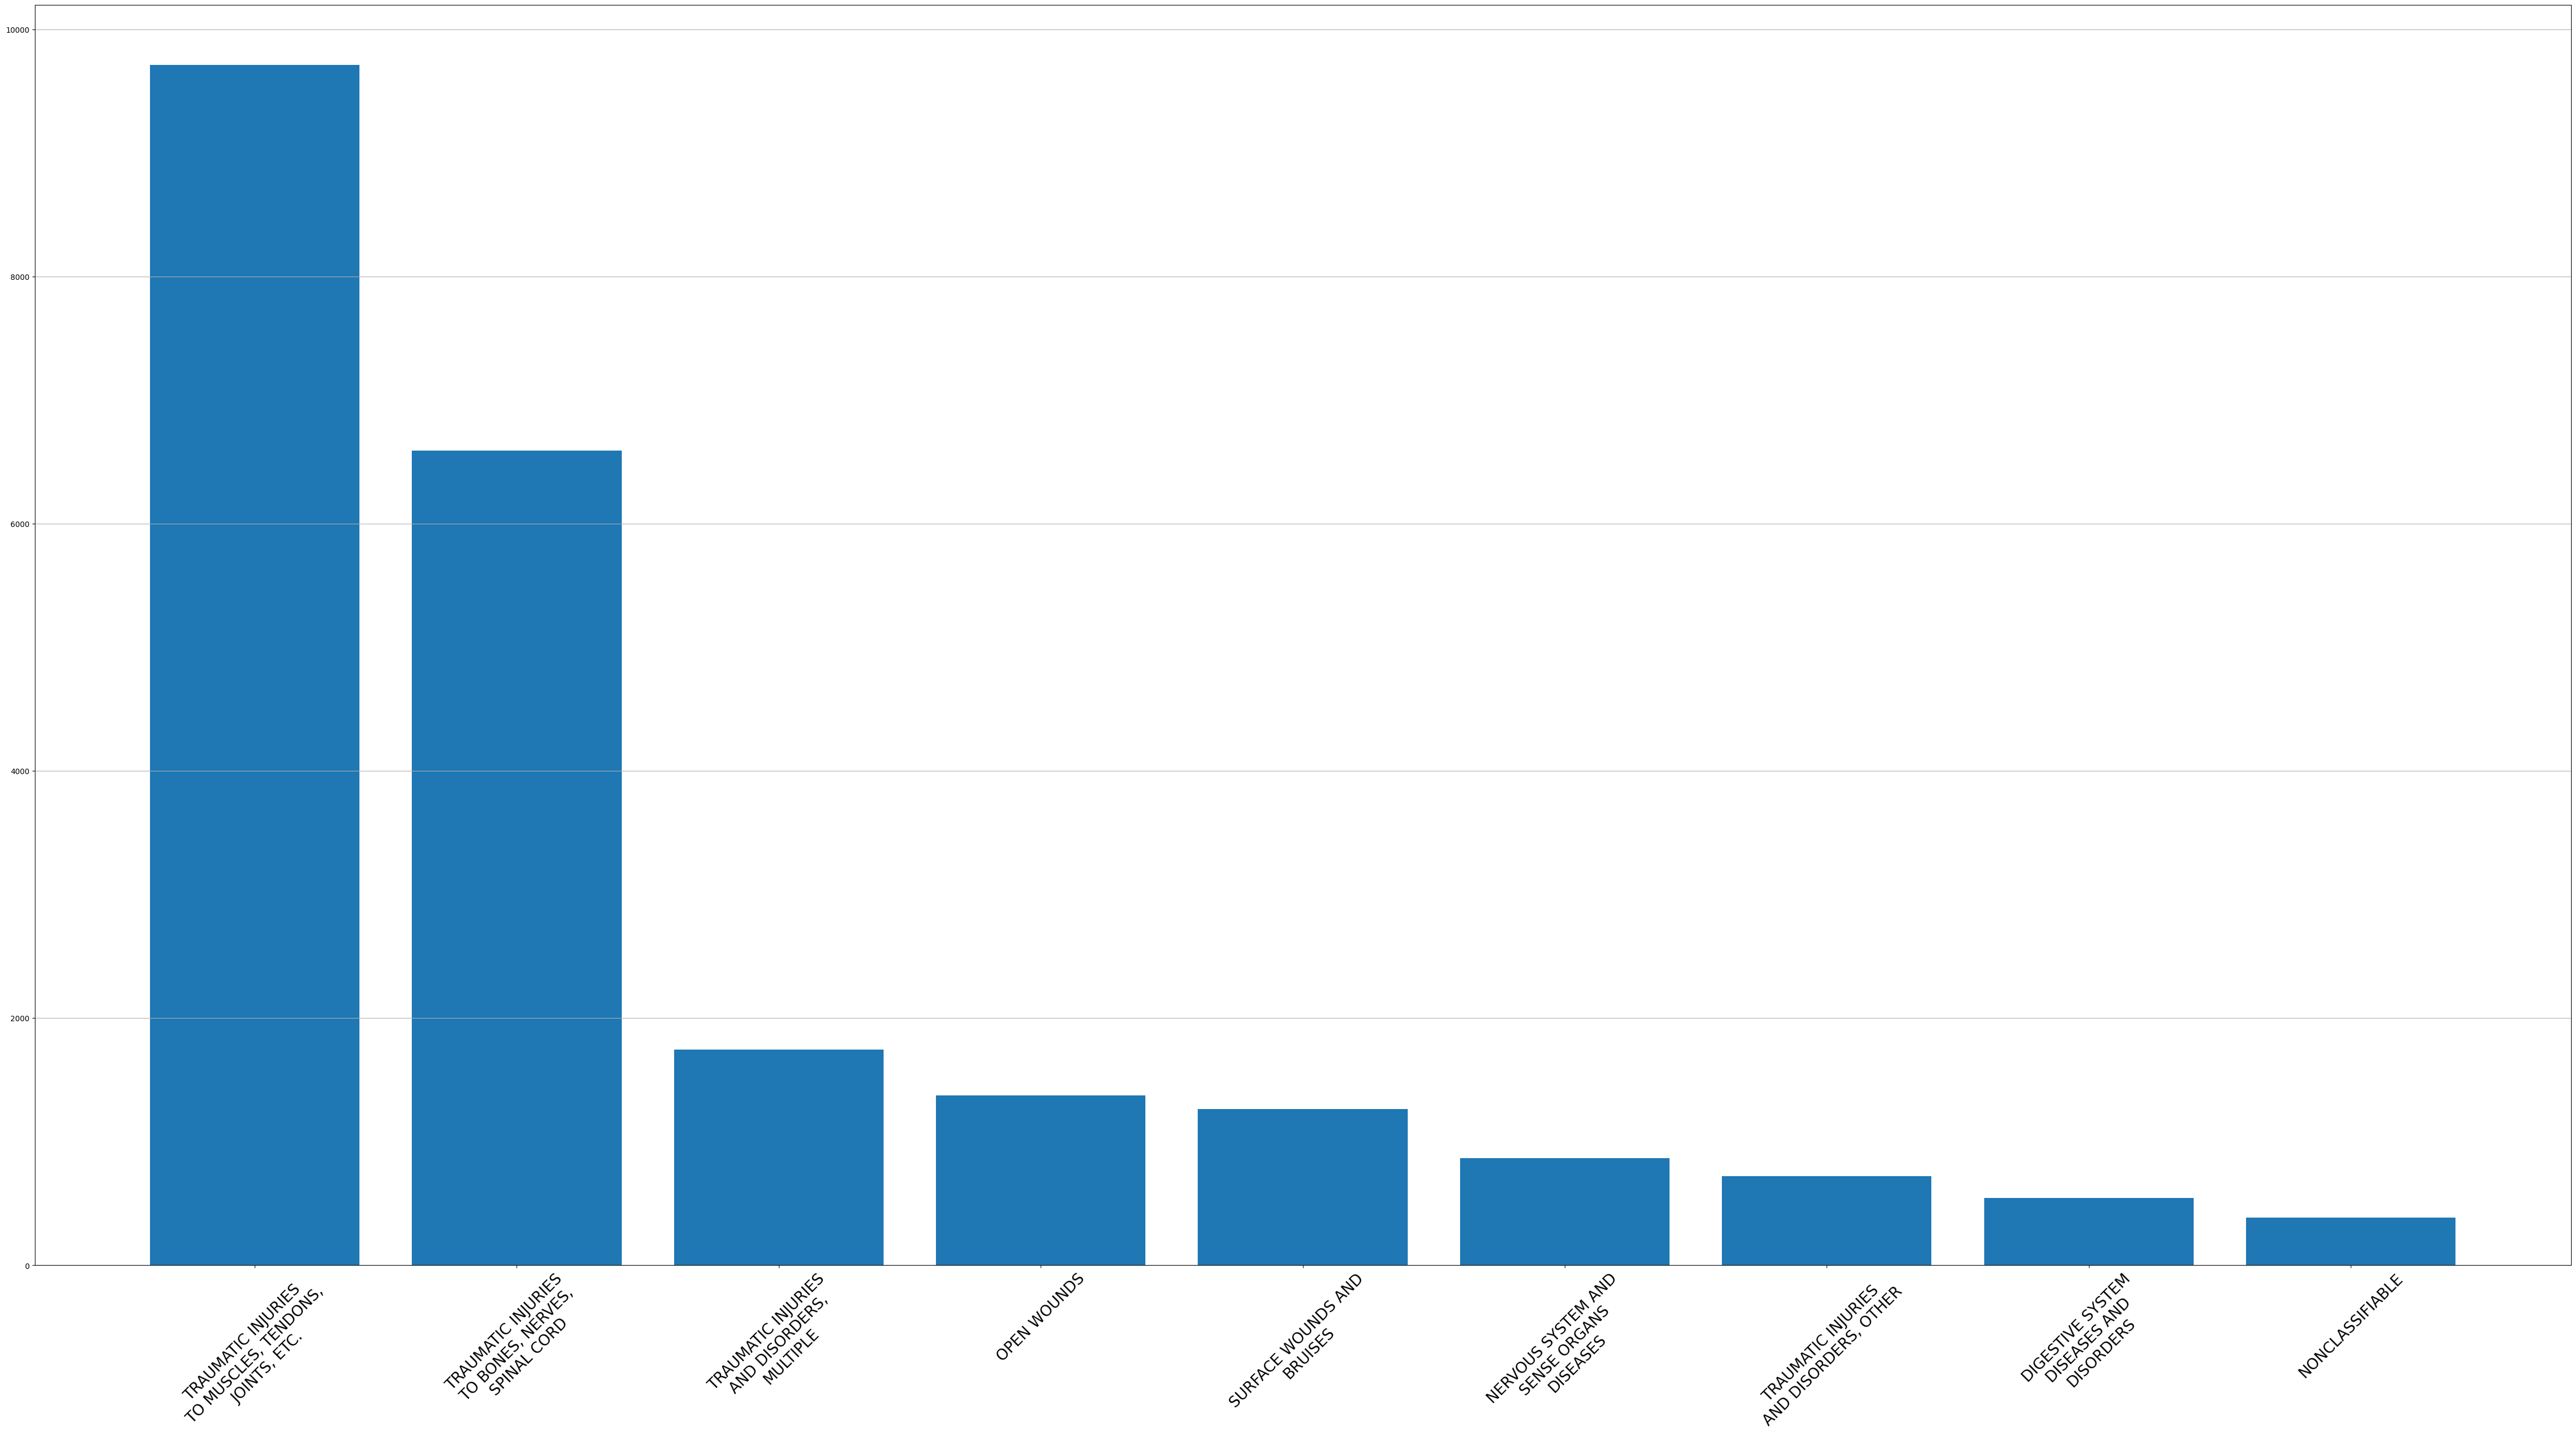

In [18]:
import textwrap

fig, ax = plt.subplots(figsize=(60, 30))
top_n=10
target = oiics_nature_of_injury
ax.grid(axis='y')
ax.bar(target.index[0:(top_n-1)], target[0:(top_n-1)])
labels = [textwrap.fill(c, 20) for c in target.index]
ax.set_xticklabels(labels[0:top_n-1], fontdict={"fontsize": 20}, rotation=45)
ax.set_xticks(ax.get_xticks(), rotation=45)

,jurisdiction_name,count_participants,count_female,percent_female,count_male,percent_male,count_gender_unknown,percent_gender_unknown,count_gender_total,percent_gender_total,...,count_citizen_status_total,percent_citizen_status_total,count_receives_public_assistance,percent_receives_public_assistance,count_nreceives_public_assistance,percent_nreceives_public_assistance,count_public_assistance_unknown,percent_public_assistance_unknown,count_public_assistance_total,percent_public_assistance_total
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,12788,83,39,0.47,44,0.53,0,0,83,100,...,83,100,35,0.42,48,0.58,0,0,83,100
232,12789,272,115,0.42,157,0.58,0,0,272,100,...,272,100,70,0.26,202,0.74,0,0,272,100
233,13731,17,2,0.12,15,0.88,0,0,17,100,...,17,100,7,0.41,10,0.59,0,0,17,100
234,16091,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0


In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.tick_params(axis='x', labelrotation=60)
ax.bar(part_of_body.index[0:19], part_of_body[0:19])

In [21]:
zip_demographics = pd.read_csv("https://data.cityofnewyork.us/resource/kku6-nxdu.csv")

In [8]:
import censusdata as census

sample = census.search('acs5', 2015, 'concept', 'transportation')

In [9]:
census_data = census.download('acs5', 2015, census.censusgeo([('state', '36'), ('zip code tabulation area', '*')]),  ['B01003_001E'])

In [56]:
zip_map

NameError: name 'zip_map' is not defined

(0.0, 110000.0)

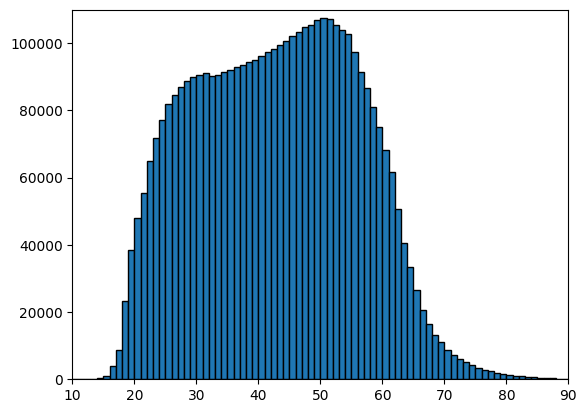

In [29]:
plt.hist(df.age_at_injury, bins=range(0, 100), edgecolor="k")
plt.xlim(10,90)
plt.ylim(0, 110000)

/tmp/ipykernel_18711/1175319706.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


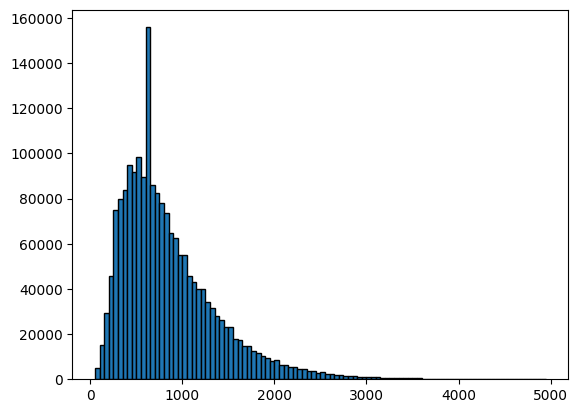

In [42]:
fig, ax = plt.subplots()
ax.hist(df.average_weekly_wage, bins=range(50, 5000, 50), edgecolor="k")
fig.show()

In [44]:
df.county

In [59]:
import geopandas as gpd
counties = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-counties.geojson")
counties["name"] = counties["name"].str[:-7].str.upper()
counties

,geoid,name,geometry
0,05000US36041,HAMILTON,"MULTIPOLYGON (((-74.82011 43.81851, -74.85417 ..."
1,05000US36017,CHENANGO,"MULTIPOLYGON (((-75.40346 42.50870, -75.40019 ..."
2,05000US36051,LIVINGSTON,"MULTIPOLYGON (((-78.06088 42.53636, -78.05929 ..."
3,05000US36097,SCHUYLER,"MULTIPOLYGON (((-77.10487 42.38929, -77.10720 ..."
4,05000US36095,SCHOHARIE,"MULTIPOLYGON (((-74.33880 42.78224, -74.28945 ..."
...,...,...,...
57,05000US36085,RICHMOND,"MULTIPOLYGON (((-74.24927 40.54492, -74.24742 ..."
58,05000US36009,CATTARAUGUS,"MULTIPOLYGON (((-79.06071 42.34792, -79.06078 ..."
59,05000US36043,HERKIMER,"MULTIPOLYGON (((-75.20736 42.94057, -75.21911 ..."
60,05000US36063,NIAGARA,"MULTIPOLYGON (((-79.05427 43.21844, -79.05286 ..."


In [22]:
county_counts = df.groupby("county_of_injury").count()["claim_identifier"]
county_counts_df = pd.DataFrame({"count": county_counts}).reset_index()
county_merge = counties.merge(county_counts_df, left_on="name", right_on="county_of_injury")

NameError: name 'county_merge' is not defined

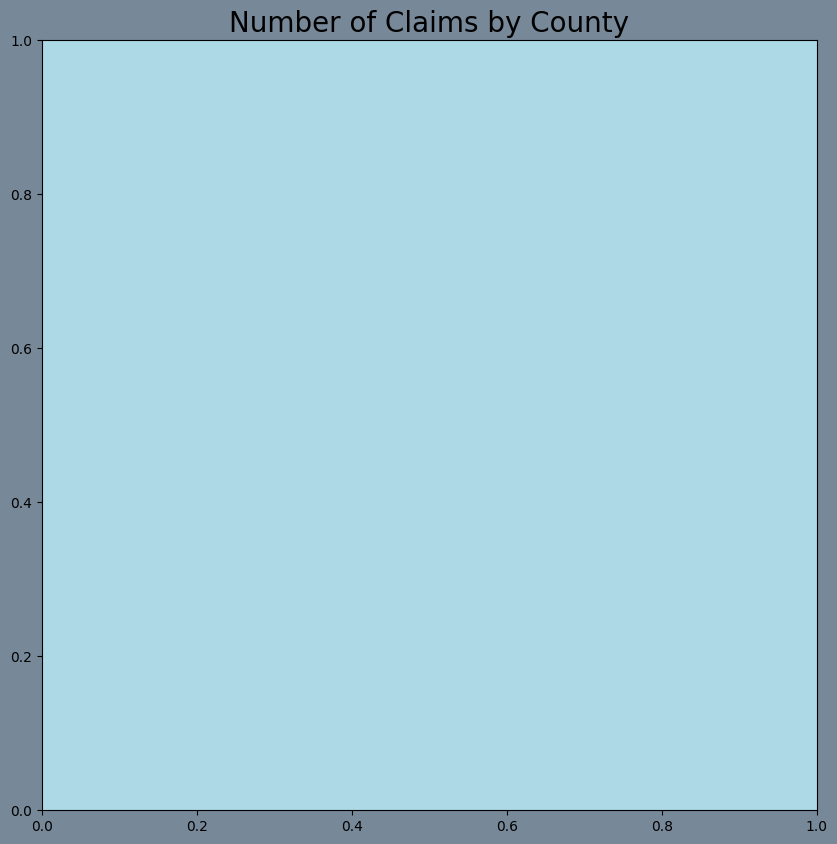

In [60]:
import matplotlib
edge_c = matplotlib.colors.colorConverter.to_rgba('black', alpha=.3)

fig, ax = plt.subplots(figsize = (10, 10), facecolor="lightslategray")
ax.set_facecolor("lightblue")
ax.set_title("Number of Claims by County", fontdict={"fontsize": 20})
county_merge.plot(ax=ax, column="count", cmap="Reds", edgecolor=edge_c, legend="True", missing_kwds= dict(color = "lightgrey",))

In [6]:
import geopandas as gpd
zip_data = gpd.read_file("https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ny_new_york_zip_codes_geo.min.json")
new_jersey = gpd.read_file("https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/nj_new_jersey_zip_codes_geo.min.json")

In [33]:
zip_data.ZCTA5CE10[zip_data.ZCTA5CE10.str[0] == '0']

414    06390
Name: ZCTA5CE10, dtype: object

In [2]:
logic = (df.zip_code.str[0]=='1') | (df.zip_code.str == '06390')
valid_zip = df[logic]

In [3]:
counts = valid_zip.groupby("zip_code").count()["claim_identifier"]
counts_df = pd.DataFrame({"count": counts}).reset_index()

In [7]:
merged = zip_data.merge(counts_df, left_on="ZCTA5CE10", right_on="zip_code")

In [10]:
new_idx = [str(i)[6:11] for i in census_data.index]
census_series = pd.Series({i: d for i, d in zip(new_idx, census_data["B01003_001E"])})
merged = merged.merge(pd.DataFrame({"population": census_series}).reset_index(), left_on="ZCTA5CE10", right_on="index")

In [12]:

merged["population"] = np.where(merged["population"] < 1000, 0, merged["population"])
merged["claims_per_capita"] = (merged["count"] / merged["population"] * 1000).replace([np.inf, -np.inf], 0)

merged.sort_values("claims_per_capita").tail(10)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,zip_code,count,index,population,claims_per_capita
898,36,12072,3612072,B5,G6350,S,124739689,1398850,+42.8848927,-074.3567411,N,"POLYGON ((-74.42127 42.88698, -74.42166 42.886...",12072,30,12072,2624,11.432927
131,36,12746,3612746,B5,G6350,S,36728527,837301,+41.4423833,-074.6568262,N,"POLYGON ((-74.63564 41.42238, -74.63528 41.422...",12746,16,12746,1388,11.527378
1295,36,12918,3612918,B5,G6350,S,101768931,1075303,+44.7007362,-073.6766570,N,"POLYGON ((-73.73482 44.64546, -73.73489 44.645...",12918,25,12918,2145,11.655012
861,36,14005,3614005,B5,G6350,S,86567899,275566,+42.9205858,-078.2500655,N,"POLYGON ((-78.29678 42.92121, -78.29690 42.921...",14005,23,14005,1930,11.917098
1335,36,12451,3612451,B5,G6350,S,30576124,134106,+42.3048926,-073.9481757,N,"POLYGON ((-73.99331 42.34953, -73.99363 42.349...",12451,22,12451,1762,12.485812
599,36,12515,3612515,B5,G6350,S,12904933,116045,+41.6847741,-074.0648402,N,"MULTIPOLYGON (((-74.08837 41.67835, -74.08750 ...",12515,17,12515,1351,12.583272
1079,36,13839,3613839,B5,G6350,S,102962117,401145,+42.2620386,-075.2520511,N,"MULTIPOLYGON (((-75.33234 42.23613, -75.33236 ...",13839,13,13839,1029,12.633625
1514,36,14723,3614723,B5,G6350,S,112001292,33957,+42.3177043,-079.1572313,N,"POLYGON ((-79.20750 42.34863, -79.21041 42.348...",14723,15,14723,1090,13.761468
398,36,13864,3613864,B5,G6350,S,69024219,14637,+42.2716683,-076.3886218,N,"POLYGON ((-76.39465 42.31851, -76.39380 42.318...",13864,14,13864,1006,13.916501
595,36,12466,3612466,B5,G6350,S,2688098,0,+41.9043446,-073.9790252,N,"MULTIPOLYGON (((-73.98390 41.90217, -73.98443 ...",12466,32,12466,2169,14.753343


(array([408.,  46.,  42.,  80., 118., 163., 162., 149., 165., 150.,  78.,
         51.,  29.,  23.,  12.,  11.,   4.,   2.,   2.,   2.]),
 array([ 0.        ,  0.73149742,  1.46299484,  2.19449225,  2.92598967,
         3.65748709,  4.38898451,  5.12048193,  5.85197935,  6.58347676,
         7.31497418,  8.0464716 ,  8.77796902,  9.50946644, 10.24096386,
        10.97246127, 11.70395869, 12.43545611, 13.16695353, 13.89845095,
        14.62994836]),
 <BarContainer object of 20 artists>)

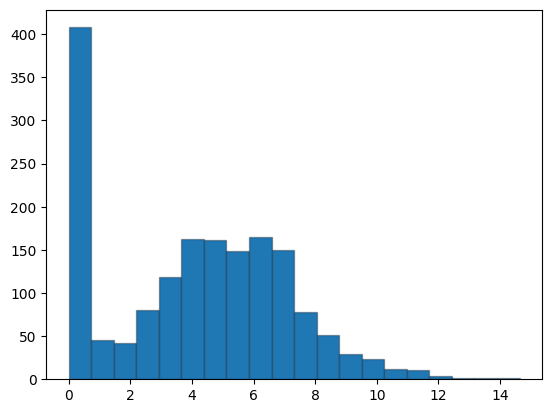

In [182]:
plt.hist(merged["claims_per_capita"], bins=20, edgecolor=edge_c)

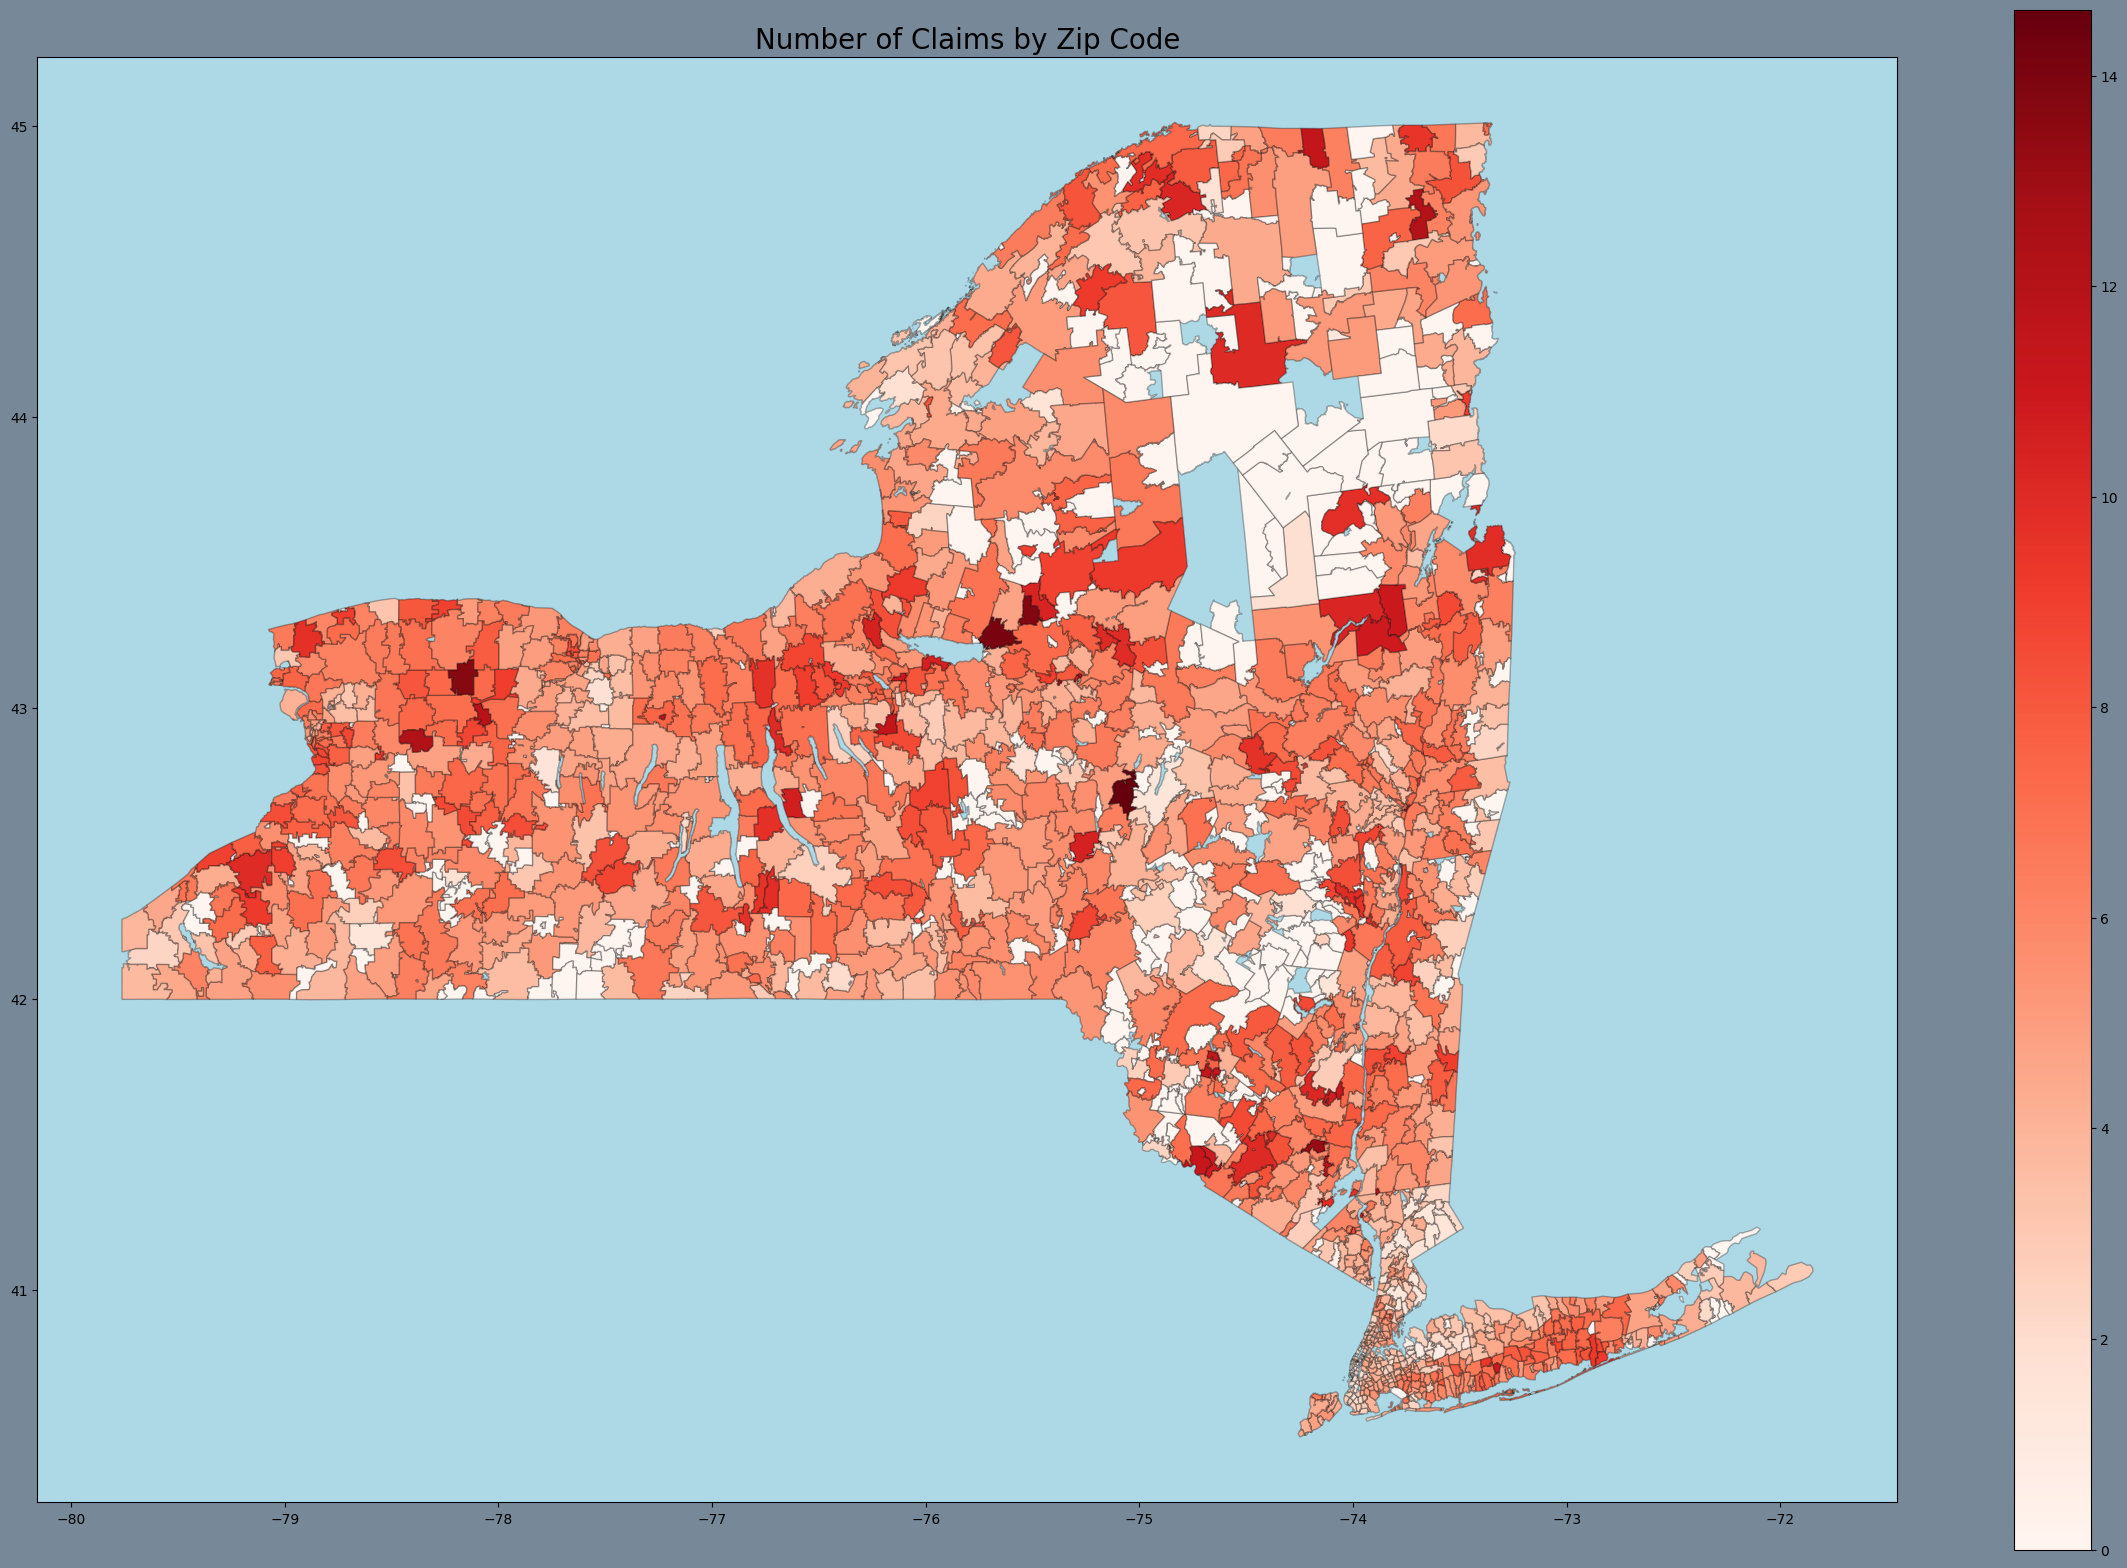

In [180]:
import matplotlib
import matplotlib.colors as colors
edge_c = matplotlib.colors.colorConverter.to_rgba('black', alpha=.3)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig, ax = plt.subplots(figsize = (30, 20), facecolor="lightslategray")
# ax.set_xlim(-74.3, -73.5)
# ax.set_ylim(40.45,41)
cmap = plt.get_cmap("Reds")
# new_cmap = truncate_colormap(cmap, 0.1, 0.2)
ax.set_facecolor("lightblue")
ax.set_title("Number of Claims by Zip Code", fontdict={"fontsize": 20})
merged.plot(ax=ax, column="claims_per_capita", cmap=cmap, edgecolor=edge_c, legend="True", missing_kwds= dict(color = "lightgrey",))
fig.savefig("plots/map.png")

AttributeError: module 'numpy' has no attribute 'isdf'

(4358935, 55)

In [37]:
pivoted = df.pivot_table(values="claim_identifier", index="highest_process", columns="attorney/representative", aggfunc=len)
pivoted_pct = pivoted / pivoted.sum()

attorney/representative,0,1
highest_process,,
1. NO RESOLUTIONS,0.531512,0.089213
2. ADMINISTRATIVE DETERMINATION,0.278147,0.070529
3B. CONCILIATION - MEETING,0.068654,0.051717
4A. HEARING - JUDGE,0.116315,0.548098
4B. HEARING - APPEAL,0.001554,0.079520
4C. HEARING - SETTLEMENT,0.003818,0.160922


In [38]:
pivoted

attorney/representative,0,1
highest_process,,
1. NO RESOLUTIONS,35218,2798
2. ADMINISTRATIVE DETERMINATION,18430,2212
3B. CONCILIATION - MEETING,4549,1622
4A. HEARING - JUDGE,7707,17190
4B. HEARING - APPEAL,103,2494
4C. HEARING - SETTLEMENT,253,5047


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logic = (df.age_at_injury >= 18) & (df.age_at_injury <= 65) # & (df.average_weekly_wage >= 50) & (df.average_weekly_wage <= 5000)
model_df = df

y = np.where(model_df["highest_process"] == "4A. HEARING - JUDGE", 1, 0)
X = model_df[["attorney/representative", 
#"age_at_injury", "average_weekly_wage", "gender", "ime-4_count"
]]

In [28]:
scaler = StandardScaler()
logistic_regression = LogisticRegression()

# X_scale = scaler.fit_transform(X)
logistic_regression.fit(X, y)

LogisticRegression()

MemoryError: Unable to allocate 71.1 GiB for an array with shape (97675, 97675) and data type float64

In [17]:
logistic_regression.coef_

array([[1.10961074]])

In [44]:
logistic_regression.intercept_

array([-0.31114537])

In [48]:
df_sub = df.sample(100000)

In [10]:
np.exp(-0.312) / (np.exp(-0.312) + 1)

0.42262663677312706

In [11]:
from sklearn import metrics
y_hat = logistic_regression.predict(X_scale)
metrics.confusion_matrix(y, y_hat)

array([[573544, 387155],
       [168235, 576556]])

In [4]:
df["accident_to_assembly"] = (df["assembly_date"] - df["accident_date"]).dt.days

In [7]:
df = df[(df.accident_to_assembly >= 0) & (df["accident_to_assembly"] < 2000)]

In [8]:
df

,accident,accident_date,age_at_injury,alternative_dispute_resolution,ancr_date,assembly_date,attorney/representative,average_weekly_wage,birth_year,c-2_date,...,ptd_date,section_32_date,wcio_cause_of_injury_code,wcio_cause_of_injury_description,wcio_nature_of_injury_code,wcio_nature_of_injury_description,wcio_part_of_body_code,wcio_part_of_body_description,zip_code,accident_to_assembly
1,1,2003-04-04,44,0,2003-07-24,2003-05-09,1,638.17,1959,2003-04-17,...,NaT,2022-01-26,NaN,NaN,NaN,NaN,NaN,NaN,13069,35
2,1,2010-03-09,45,0,2012-06-15,2010-08-31,0,0.00,1964,2011-12-22,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,11951,175
3,1,2001-05-17,37,0,2002-11-05,2001-06-08,0,403.73,1964,2001-05-29,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,12203,22
4,1,2019-02-04,38,0,NaT,2019-02-05,0,0.00,1980,2019-02-05,...,NaT,NaT,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,33.0,LOWER ARM,14701,1
5,1,2013-03-18,31,0,NaT,2013-04-30,0,0.00,1981,2013-04-12,...,NaT,NaT,99.0,"OTHER - MISCELLANEOUS, NOC",10.0,CONTUSION,32.0,ELBOW,11414,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2014-06-13,51,0,2015-10-16,2015-04-20,1,4529.51,1962,2015-04-21,...,NaT,NaT,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),11790,311
99996,1,2000-03-24,0,0,NaT,2000-05-23,1,0.00,0,NaT,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,10573,60
99997,1,2006-12-13,49,0,2007-05-01,2007-03-02,0,0.00,1957,2007-02-27,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,10463,79
99998,1,2019-06-28,16,0,NaT,2019-07-01,0,0.00,2002,2019-07-01,...,NaT,NaT,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,36.0,FINGER(S),13147,3


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 9.0000e+00, 1.80

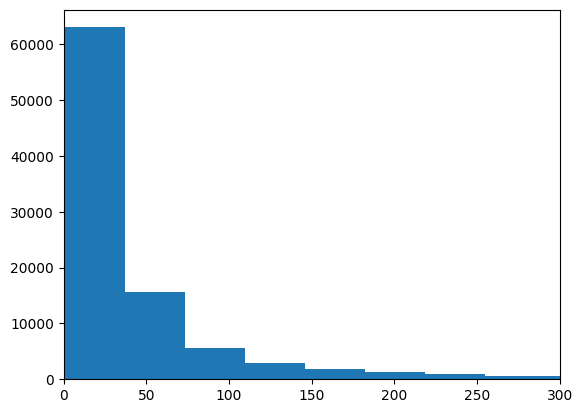

In [5]:
plt.xlim(0, 300)
plt.hist(df["accident_to_assembly"], bins=300)

In [6]:
median_groupby = df.groupby("assembly_date").agg(np.median)["accident_to_assembly"]
mean_groupby = df.groupby("assembly_date").agg(np.mean)["accident_to_assembly"]

In [14]:
df["assembly_week"] = df["assembly_date"] + pd.offsets.Week(-1)

In [19]:
median_groupby = df.groupby("assembly_date").agg(np.median)["accident_to_assembly"]
mean_groupby = df.groupby("assembly_date").agg(np.mean)["accident_to_assembly"]

In [23]:
mean_groupby["2020-01-01":]

assembly_date
2020-01-01     59.750000
2020-01-02     37.333333
2020-01-03    241.200000
2020-01-06     32.615385
2020-01-07     37.000000
                 ...    
2022-05-30     17.000000
2022-05-31     15.857143
2022-06-01     18.217391
2022-06-02     29.550000
2022-06-03    130.000000
Name: accident_to_assembly, Length: 662, dtype: float64

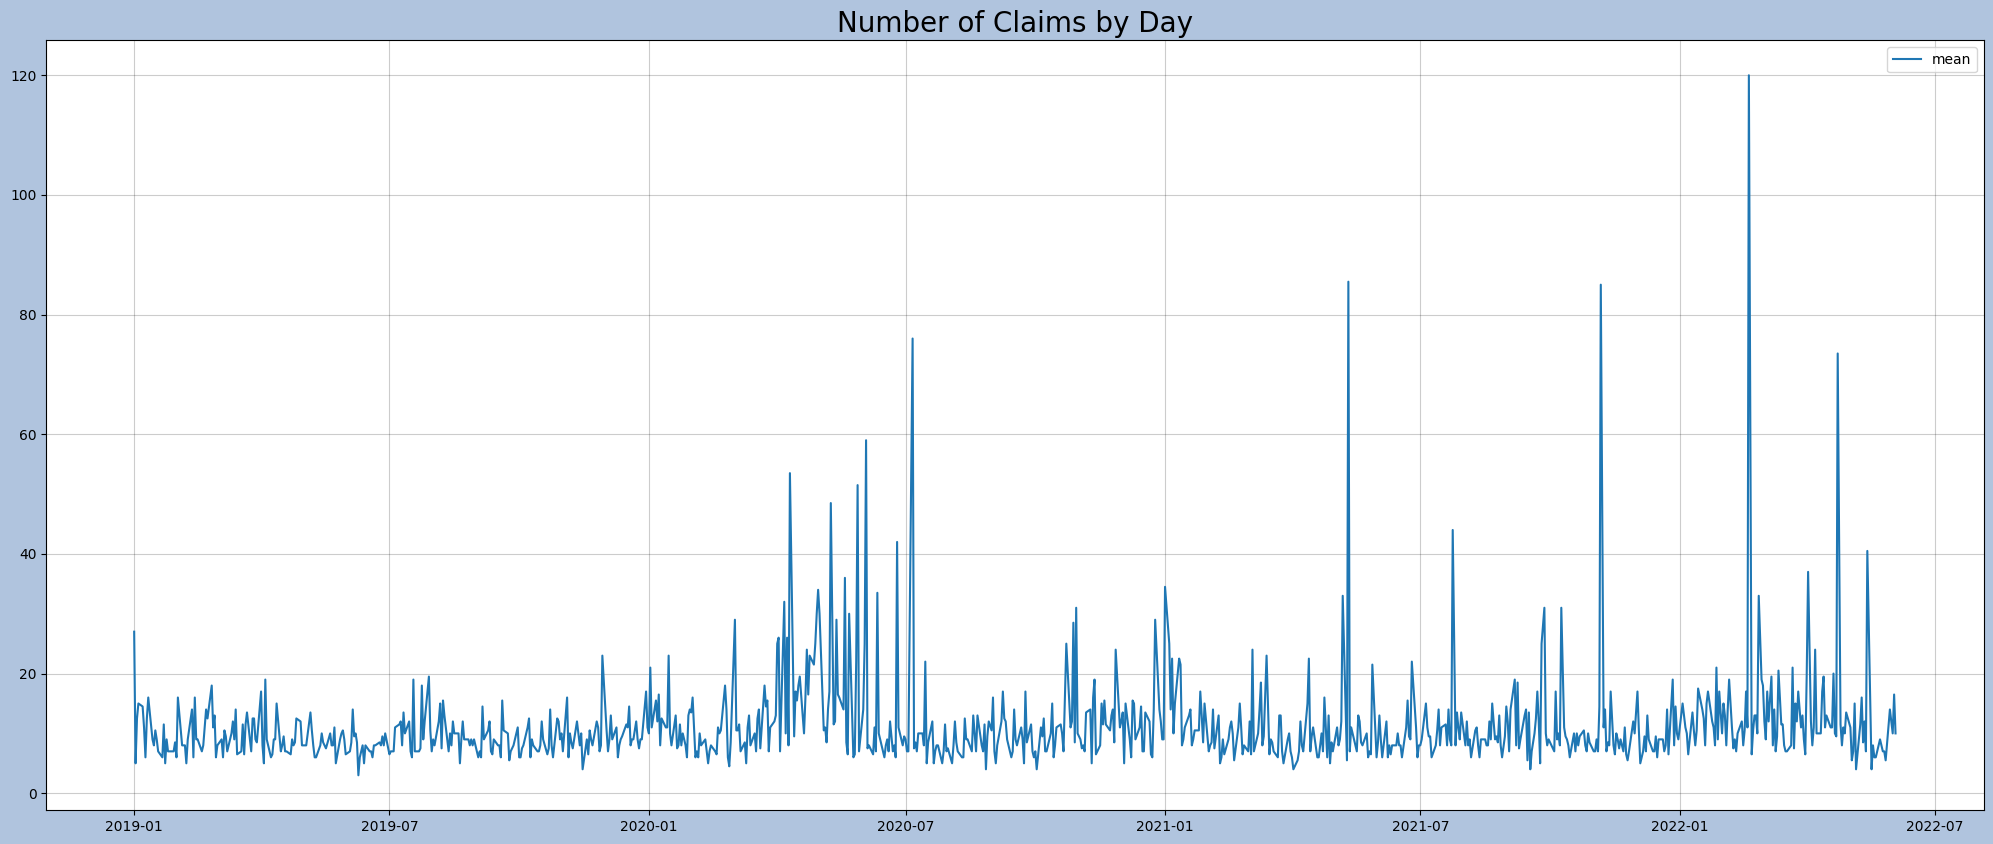

In [26]:
import matplotlib
plot_face_color="lightsteelblue"

fig, ax = plt.subplots(figsize=(25, 10), facecolor=plot_face_color)
edge_c = matplotlib.colors.colorConverter.to_rgba('black', alpha=.3)


# ax.set_xlim(pd.to_datetime("2018-01-01"), pd.to_datetime("2022-01-01"))
ax.set_title("Number of Claims by Day", fontdict={'fontsize': 20})
ax.grid(color=edge_c, alpha=0.2)
# ax.plot(mean_groupby["2019-01-01":])
ax.plot(median_groupby["2019-01-01":])
ax.legend(['mean', 'median'])

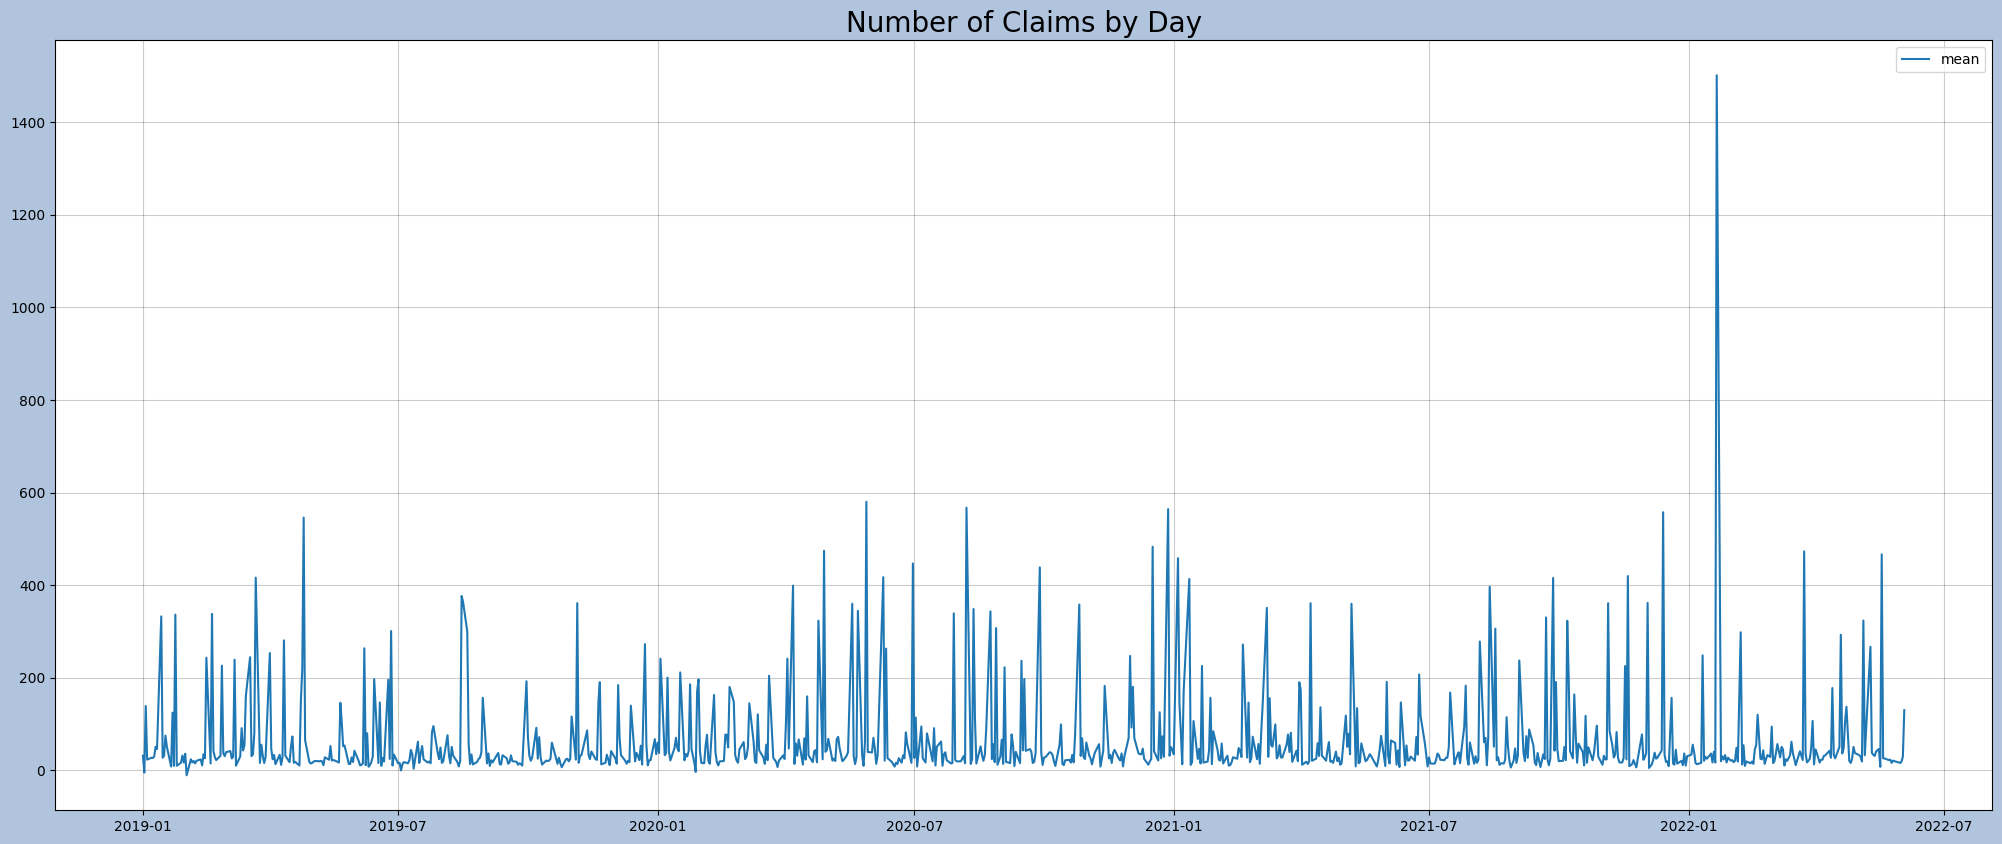

In [27]:
import matplotlib
plot_face_color="lightsteelblue"

fig, ax = plt.subplots(figsize=(25, 10), facecolor=plot_face_color)
edge_c = matplotlib.colors.colorConverter.to_rgba('black', alpha=.3)


# ax.set_xlim(pd.to_datetime("2018-01-01"), pd.to_datetime("2022-01-01"))
ax.set_title("Number of Claims by Day", fontdict={'fontsize': 20})
ax.grid(color=edge_c, alpha=0.2)
ax.plot(mean_groupby["2019-01-01":])
# ax.plot(median_groupby["2019-01-01":])
ax.legend(['mean', 'median'])